In [12]:
import os
import pickle as pk

import matplotlib.pyplot as plt
from sklearn import manifold
import numpy as np

In [27]:
with open(os.path.join("..", "data", "ZINC", "sampled_smiles_10000_fingerprints.pk"), "rb") as f:
    zinc_fps = pk.load(f)

In [28]:
zinc_fps.shape

(10000, 740)

In [29]:
with open(os.path.join("..", "data", "BACE_fingerprints.pk"), "rb") as f:
    bace_fps = np.array(pk.load(f)).squeeze()

In [30]:
with open(os.path.join("..", "data", "ClinTox_fingerprints.pk"), "rb") as f:
    clintox_fps = np.array(pk.load(f)).squeeze()

In [31]:
bace_fps.shape

(1513, 740)

In [32]:
clintox_fps.shape

(1477, 740)

In [33]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)

In [34]:
y = tsne.fit_transform(np.concatenate([zinc_fps, bace_fps, clintox_fps], axis=0))

In [35]:
colors = [0] * zinc_fps.shape[0] + [1] * bace_fps.shape[0] + [2] * clintox_fps.shape[0]

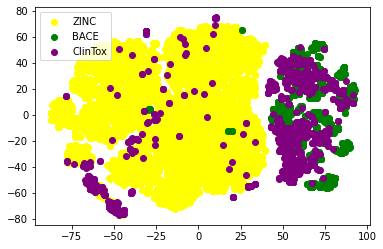

In [37]:
fig, ax = plt.subplots()
ax.scatter(y[:10000, 0], y[:10000, 1], c="yellow", label="ZINC")
ax.scatter(y[10000:11513, 0], y[10000:11513, 1], c="green", label="BACE")
ax.scatter(y[11513:, 0], y[11513:, 1], c="purple", label="ClinTox")
ax.legend()
fig.savefig(os.path.join("..","logs","ZINC10k_BACE_ClinTox_tsne.jpg"), dpi=300)